# **CS156 Assignment 1**

## **Question 1: Moore's Law**

Use the scripts from [here](https://github.com/preshing/analyze-spec-benchmarks) to download a large amount of data relating to CPU specs. The scripts might take as long as an hour, depending on your connection speed. (Pay attention to the line "If you want to skip the steps in this section, you can simply download the aggregated result files from http://preshing.com/files/specdata20120207.zip and extract them to this folder." This will be faster and save you some troubles while providing the same dataset.)



In [0]:
#importing the necessary libraries
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

### **Task 1: Extract the date and base speed for a benchmark of your choice.**

In [0]:
#load the data into a pandas dataframe
benchmark = pd.read_csv("benchmarks.txt")
benchmark.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,testID,benchName,base,peak
0,cpu95-19990104-03254,101.tomcatv,19.40,27.1
1,cpu95-19990104-03254,102.swim,27.20,34.8
2,cpu95-19990104-03254,103.su2cor,10.10,9.98
3,cpu95-19990104-03254,104.hydro2d,8.58,8.61
4,cpu95-19990104-03254,107.mgrid,8.94,9.44


In [0]:
'''
Creating function to extract the date value into a datetime obj
'''

def extract_date(testID):
    #truncating the date before the first digit and after the first '-' 
    date = testID[testID.find('-') + 1:] 
    #if the date is in the format YYMMDD and is before 2000
    if date[0] == '9':
        date = '19' + testID[testID.find('-') + 1:testID.find('-') + 7]
    #if the date is in the format YYMMDD and is after 2000
    elif date[0] == '0':
        date = '20' + testID[testID.find('-') + 1:testID.find('-') + 7]
    ##if the date is in the format YYYYMMDD
    else:
        date = testID[testID.find('-') + 1:testID.find('-') + 9]
    #return the date as a datetime object
    return datetime.datetime.strptime(date, "%Y%m%d")

In [0]:
'''
Extracting the dates and base speeds for the "101.tomcatv" benchmark
'''

#creating two lists to store the dates and base speeds
dates_lst = []
base_speed_lst = []

for i in range(len(benchmark)):
    #if the benchName of the entry is 101.tomcatv 173.applu
    if benchmark["benchName"][i] == "101.tomcatv":
      #if there is no '-' in the date, skip the entry
      if benchmark["testID"][i].find('-') == -1:
        continue
      else:
        #extract the date into a datetime object with the code above
        #and append it to the dates list
        dates_lst.append(extract_date(benchmark["testID"][i]))
        #extract the corresponding base speed and append it to the
        #base speed list
        base_speed_lst.append(benchmark["base"][i])

### **Task 2: Plot the data in a semi-log plot.**

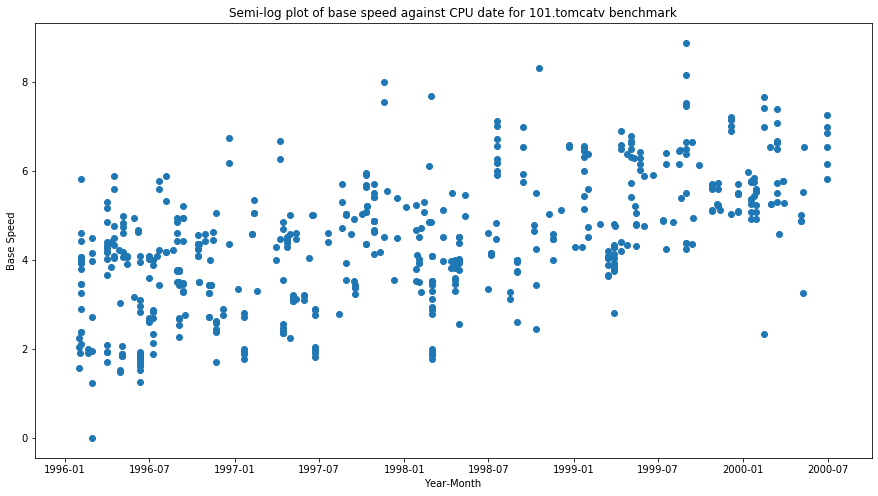

In [0]:
# Plotting the data in a semi-log plot.

plt.figure(figsize=(15,8))
plt.scatter(dates_lst, np.log2(base_speed_lst))
plt.xlabel('Year-Month')
plt.ylabel('Base Speed')
plt.title("Semi-log plot of base speed against CPU date for 101.tomcatv benchmark")
plt.show()

### **Task 3: Now train a linear model to fit your plot.**

In [0]:
# converting the dates in the dates list from datetime objects to floats
dates_lst_float = []
for date in dates_lst:
    dates_lst_float.append(round(date.year + float(date.month)/12.1,5))

# separating the dates in the dates list into training and test sets 
# here, we take first 80% as training data and last 20% as test data
training_dates = dates_lst_float[:-108]
test_dates = dates_lst_float[-108:]

# further processing the training and test dates
# instead of just the dates, we are getting the difference of each
# date with the previous date in the dates list
train = []
for i in range(len(training_dates)):
  train.append([training_dates[i] - training_dates[0]])
  
test = []
for i in range(len(test_dates)):
  test.append([test_dates[i] - test_dates[0]])

# separating base speeds into training and test sets 
# here, we take first 80% as training data and last 20% as test data
training_base = base_speed_lst[:-108]
test_base = base_speed_lst[-108:]

# fitting the linear regression model to the training data
# here, we convert the base speeds to log in adherence of
# Moore's law, which states that computer speeds double every 2 years
lin_reg = linear_model.LinearRegression()
lin_reg.fit(np.array(train).reshape(-1,1), np.log(training_base))

# printing out the results
lin_pred_results = lin_reg.predict(test)
print("Coefficient: ", lin_reg.coef_, "Intercept: ", lin_reg.intercept_)

Coefficient:  [0.45081004] Intercept:  3.5469174160958303


In [0]:
'''
Getting the y-values for the Moore's Law Curve
'''
from scipy.interpolate import interp1d

# creating arbitrary array for the x-axis
x = np.array([0,1,2])

# creating array of values for the y-axis
# here, we should be using 9, 18, 36, since Moore's Law states that 
# the computing power will double every two years, but we are using
# 44 because the graph goes a little beyond two years, as seen below
y = np.array([9, 18, 44])

# creating linspace of 542 values for the x-axis - same number of 
# values as there are in the dates list
x_new = np.linspace(min(x), max(x),542)

# interpolate and make the y values smoother
f = interp1d(x, y, kind='quadratic')
y_smooth = f(x_new)

'''
Getting the x-values for the Moore's Law Curve
'''
# defining the start and ends dates using pandas
start = pd.Timestamp('1996-01-31')
end = pd.Timestamp('2000-06-30')
# creating a linspace of 542 dates between those start and end dates
t = np.linspace(start.value, end.value, 542)
t = pd.to_datetime(t)

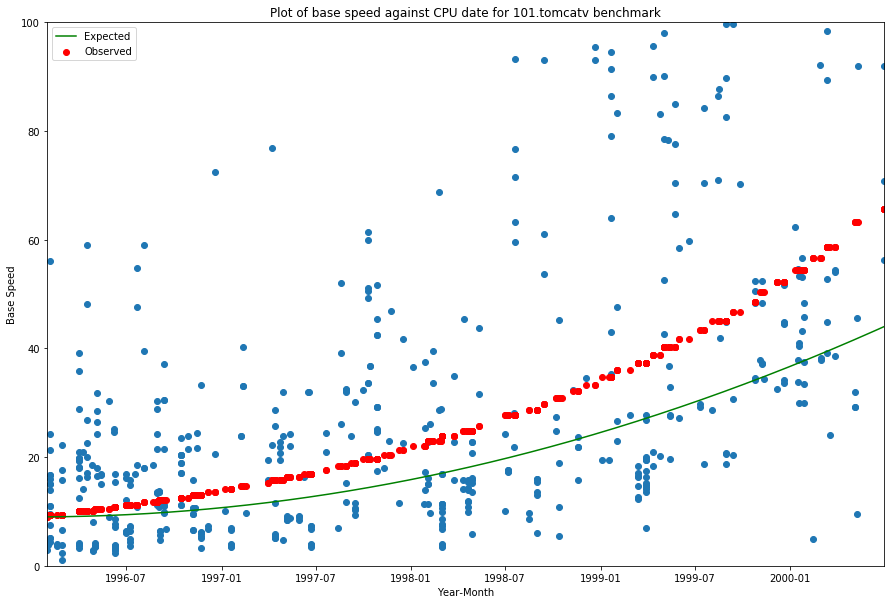

In [0]:
# once again, we have to further process the dates list - instead 
# of just using the dates, we are getting the difference of each
# date with the previous date in the dates list
date_lst_processed = []
for i in range(len(dates_lst_float)):
  date_lst_processed.append([dates_lst_float[i] - dates_lst_float[0]])

# predicting the results with the linear regression we trained earlier
lin_pred_results = (lin_reg.predict(date_lst_processed))

'''
plotting the results
'''
# defining the size of the graph
plt.figure(figsize=(15,10))
# zooming in on the target portion of the graph 
plt.axis([min(dates_lst),max(dates_lst),0,100])
# creating a scatter plot of all the base speeds, like earlier
plt.scatter(dates_lst, base_speed_lst)
# creating a scatter plot of the values from the linear regression 
plt.scatter(dates_lst, np.exp(lin_pred_results), color="red", label = "Observed")
# plotting the Moore's Law curve
plt.plot(np.asarray(t), y_smooth, color='green', label = "Expected")
# adding the x- and y-axis labels
plt.xlabel('Year-Month')
plt.ylabel('Base Speed')
# adding the plot title
plt.title("Plot of base speed against CPU date for 101.tomcatv benchmark")
# showing the labels and the graph itself
plt.legend()
plt.show()

### **Task 4: How well is Moore's Law holding up?**

As seen from the plot above, the data points from the linear regression don't adhere to Moore's Law completely - in fact, it seemed to be progressing a little quicker than what the Moore's Law predicts. Instead of doubling every two years, it doubles every 20 months or so, slightly quicker than the 24 month time period posited by Moore's Law.

## **Question 2: MNIST Digits**

No machine learning course would be complete without using the MNIST dataset. This dataset was a hugely influential dataset of handwriting digits (0-9).

* Using scikit-learn, load the MNIST digits (see [here](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits)).
* Plot some of the examples.
* Choose two digit classes (e.g. 7s and 3s), and train a k-nearest neighbor classifier.
* Report your error rates on a held out part of the data.
* (optional) Test your model on the full dataset (available from [here](http://yann.lecun.com/exdb/mnist/)).

Keep a record of your figures and results, and make sure that they are easily accessible when you come to class (e.g. be able to state your error rate, or paste your code/figure into a group doc.)

### **1. Using Scikit.learn, load the MNIST digits**

In [0]:
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

### **2. Plot some of the examples.**

(1797, 64)


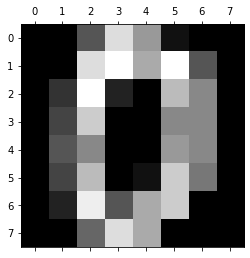

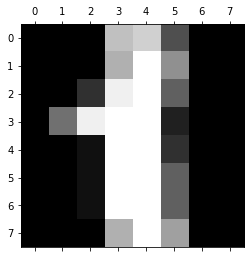

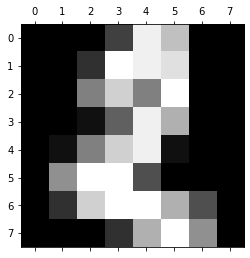

In [0]:
# loading the MNIST digits with sklearn
digits = load_digits()
# checking the shape of the dataset
print(digits.data.shape)

# plotting some of the examples
plt.matshow(digits.images[0]) 
plt.matshow(digits.images[1]) 
plt.matshow(digits.images[2]) 
plt.show() 

### **3. Choose two digit classes (e.g 7s and 3s) , and train a k-nearest neighbor classifier.**

In [0]:
# extracting the data for digits 3 and 7 
data = []
number = []

for i in range(len(digits.target)):
    if digits.target[i] == 3 or digits.target[i] == 7:
        data.append(digits.data[i])
        number.append(digits.target[i])

In [0]:
'''
Training a k-nearest neighbor classifier
'''
# separating data and their corresponding numbers into training and test sets 
# here, with the train_test_split function, we take a random 20% portion of the data as the test data
training_data, test_data, training_numbers, test_numbers = train_test_split(data, number, test_size = 0.2)

# defining the value of k
k = 5

# fitting the knn to the training data set 
knn = KNeighborsClassifier(k)
knn.fit(training_data, training_numbers)

# using the knn to predict the test data
knn_pred = knn.predict(test_data)

### **4. Report your error rates on a held out part of the data.**

In [0]:
# calculating error rate
err = (1 - sum(knn_pred == test_numbers) / len(test_numbers)) * 100
print("Error rate is ", "%.2f" % err,"%")
print("")

# creating the confusion matrix to visualize the number of TP, TN, FP, and FN
print("Confusion matrix:\n%s" % confusion_matrix(test_numbers, knn_pred))

Error rate is  0.00 %

Confusion matrix:
[[31  0]
 [ 0 42]]


At a 0% error rate, I'd say that the knn is very accurate, and that the k-value of 5 is highly effective for this context. Also, the method of isolating the test data from the traning data by using the `train_test_split` function was also very appropriate given that this is a classification problem and not a time-series problem where the order of the data points matters.